In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
f = 'Bottle.wav'
samplerate, data = wavfile.read(f)
print('Sampling Rate:',samplerate)
print('Audio Shape:',np.shape(data))

Sampling Rate: 44100
Audio Shape: (59262, 2)


C:\Users\leous\AppData\Local\Temp\ipykernel_12556\2869860332.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(f)


In [3]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
print(f"длительность {duration} \n временная шкала {time}")

длительность 1.3438095238095238 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.34374150e+00
 1.34376417e+00 1.34378685e+00]


In [4]:
type(data)

numpy.ndarray

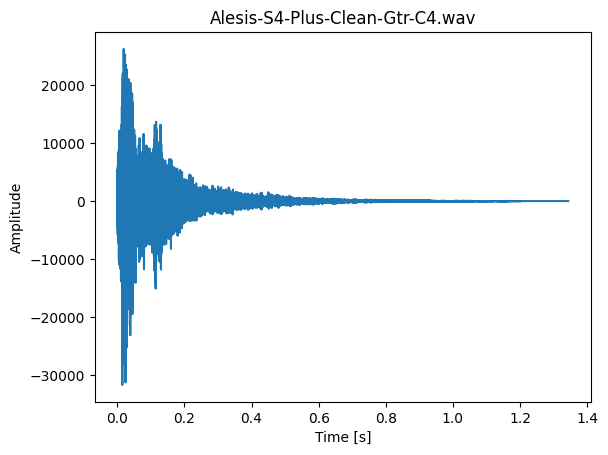

In [5]:
plt.plot(time, data[:, 0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Alesis-S4-Plus-Clean-Gtr-C4.wav')
plt.show()

In [6]:
# слушаем, что получилось
# sd.play(data[:, 0], samplerate)
sd.wait()

# Stereo to Mono

Sampling Rate: 44100
Audio Shape: (59262,)


C:\Users\leous\AppData\Local\Temp\ipykernel_12556\2324951501.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


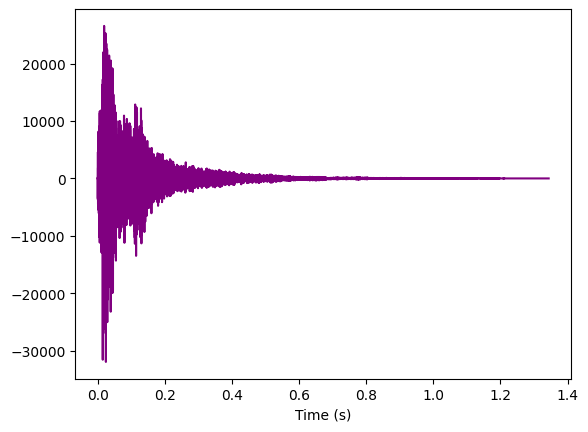

In [7]:
asegment = AudioSegment.from_wav(f)
asegment = asegment.set_channels(1)
asegment.export("mono.wav",format="wav")
s,a = wavfile.read("mono.wav")
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
na = data.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

# Спектрограмма

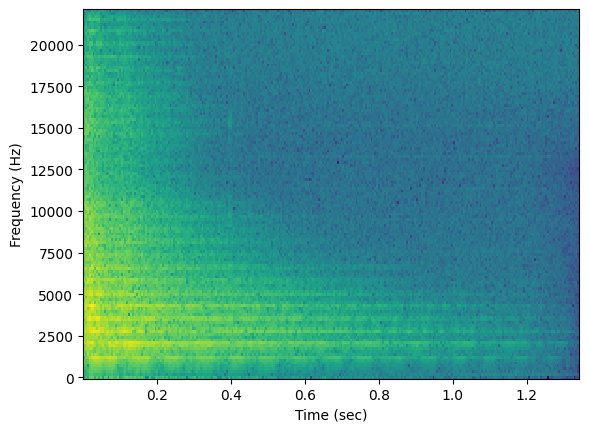

In [8]:
adata = data[:, 0]
s = samplerate
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

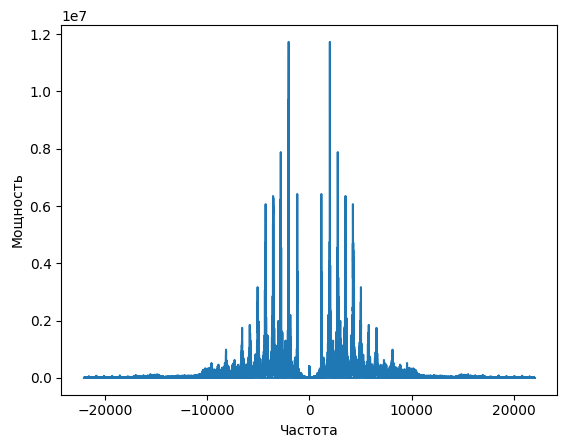

In [9]:
from scipy.fft import fft, fftfreq
# число точек в normalized_tone
N = int(samplerate * duration)
yf = fft(data[:, 0])
xf = fftfreq(N, 1 / samplerate)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

In [10]:
np.max(xf) 

22049.25584691708

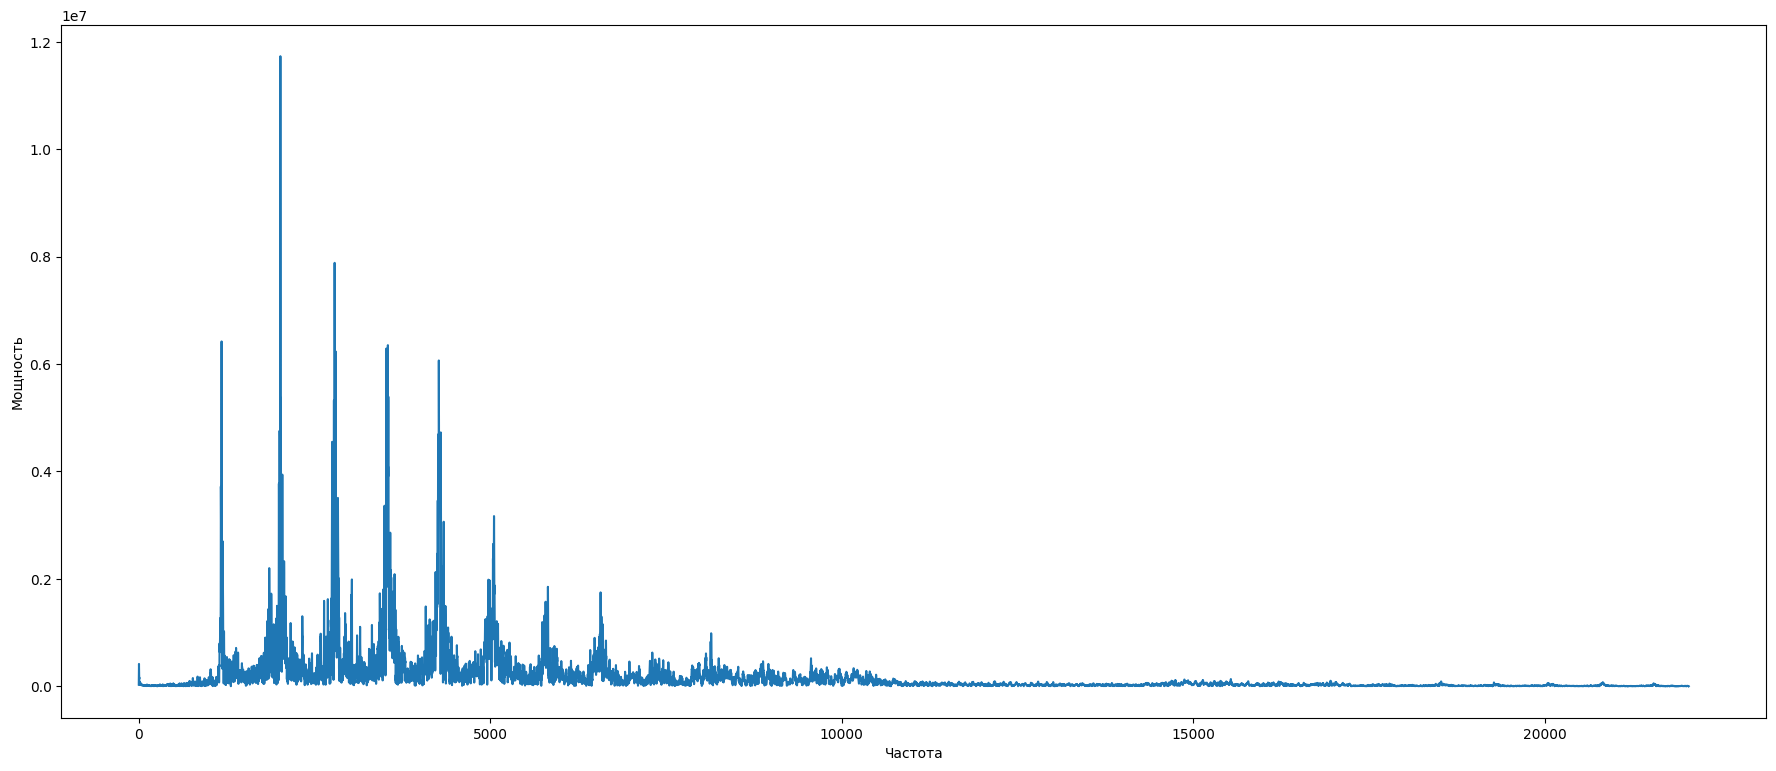

In [11]:
from scipy.fft import rfft, rfftfreq
# число точек в normalized_tone
rN = int(samplerate * duration)
ryf = rfft(data[:, 0])
rxf = rfftfreq(rN, 1 / samplerate)
plt.figure(figsize=(22, 9))
plt.plot(rxf, np.abs(ryf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()


In [12]:
rxf
xf

array([ 0.        ,  0.74415308,  1.48830617, ..., -2.23245925,
       -1.48830617, -0.74415308])

In [13]:
# Найдем максимальную частоту около 5000
print()
i1 = list(map(int, rxf)).index(4800)
i2 = list(map(int, rxf)).index(5200)
print(max(ryf[i1:i2]))
print(list(ryf).index(max(ryf[i1:i2])))
print(rxf[list(ryf).index(max(ryf[i1:i2]))])



(2326326.2949490175+939014.4123936868j)
6776
5042.381289865344


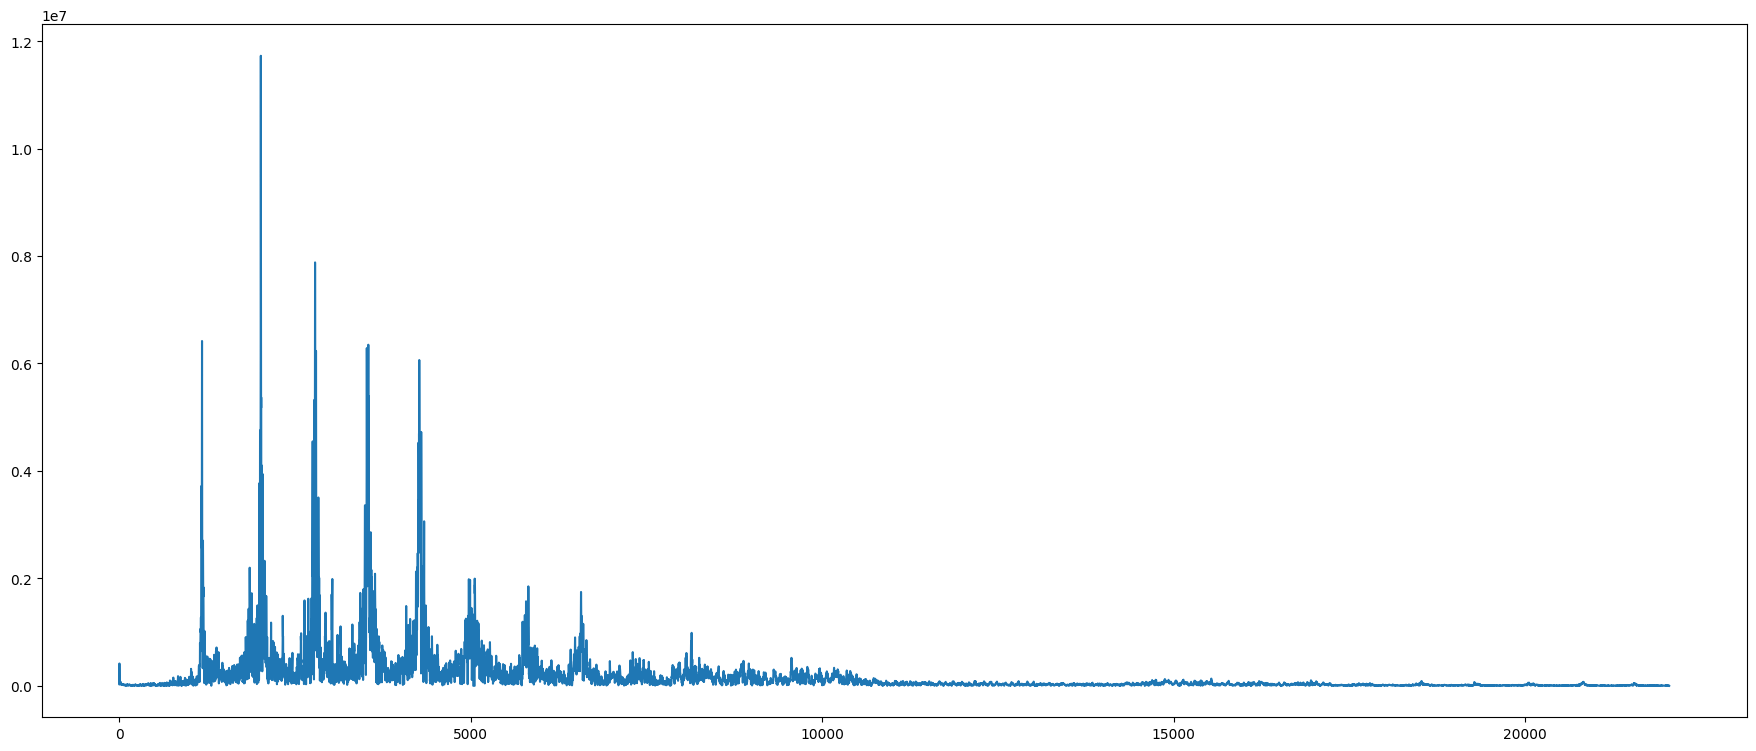

In [14]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(rxf) / (samplerate / 2)
# Наша целевая частота
target_idx = int(points_per_freq * 5042.381289865344)
target_idx1 = int(points_per_freq * 10000)
ryf[target_idx-10:target_idx+20] = 0
plt.figure(figsize=(22, 9))
plt.plot(rxf, np.abs(ryf),zorder=1)
# plt.scatter((rxf[i1], rxf[i2], rxf[list(ryf).index(max(ryf[i1:i2]))]), (np.abs(ryf[i1]), np.abs(ryf[i2]), np.abs(ryf[list(ryf).index(max(ryf[i1:i2]))])), color = 'hotpink',zorder=2)
plt.show()

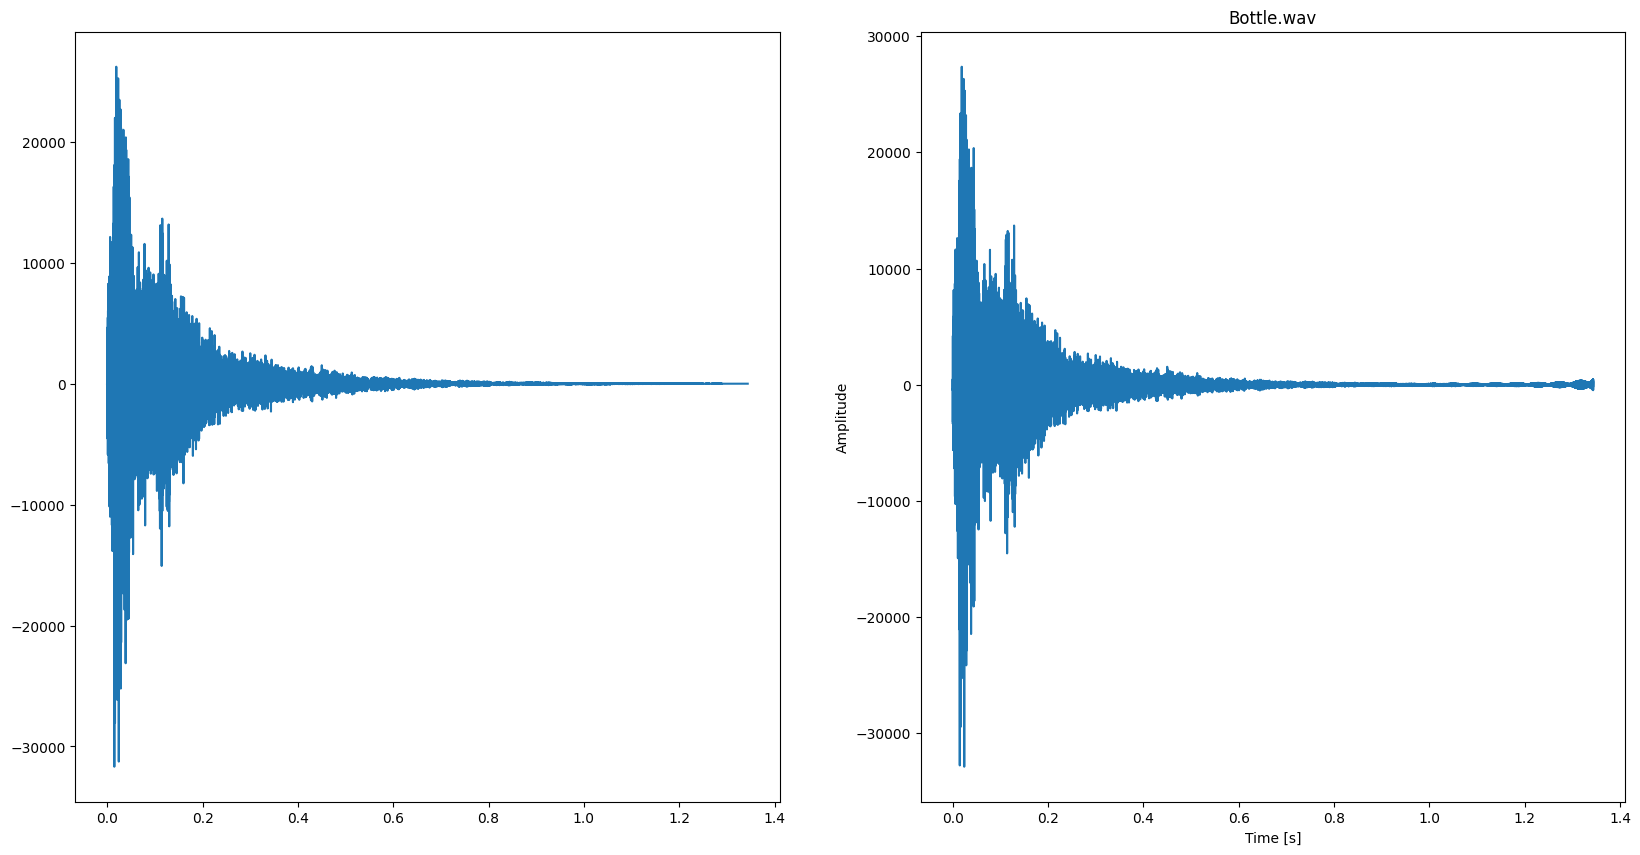

In [15]:
from scipy.fft import irfft
new_sig = irfft(ryf)
fig, ax = plt.subplots(nrows= 1 , ncols= 2, figsize=(20, 10) )
ax[0].plot(time, data[:, 0])
ax[1].plot(time, new_sig)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Bottle.wav')
plt.show()

In [16]:
# слушаем, что получилось
# sd.play(data[:, 0], samplerate)
sd.wait()
# sd.play(new_sig, samplerate)
sd.wait()

In [17]:
x = data[:, 0]                                  # Исходный сигнал
M = 20                                          # Количество значений в фильтре
fmax = 10000                                    # Верхняя граница для фильтра
div = 6                                         # Значение для получения адекватных значений m
N = int(samplerate * duration)                  # Длительность
yf = rfft(x)                                    # Преобразование Фурье
xf = rfftfreq(N, 1 / samplerate)                # Частоты для преобразования
# mmas = np.array([i * np.log2(i + 1) for i in range(0, M + 2)])
mmas = [np.exp(np.log(fmax)/(M**(1/div)) * i**(1/div)) for i in range(M+2)] # Составление амссива m
# mmas = [1, 10, 20, 60, 200, 600, 1500, 3500, 7000, 15000]
print("m", mmas)
f_l = [0]
f_h = []
for i in mmas:
    f_l.append(i)
    f_h.append(i)
    if len(f_h) == len(mmas):
        f_h.append(fmax)
f_l[1] = f_l[2] / 2
print("f1",f_l)
print("fh",f_h)

m [1.0, 267.823649716069, 531.0901860655188, 823.5566804879128, 1145.2438422188707, 1495.5540179272048, 1873.9383193891265, 2279.962114161832, 2713.2941329219584, 3173.6868138131995, 3660.95906259579, 4174.982721479325, 4715.672202886057, 5282.976545886873, 5876.873277253887, 6497.363613757923, 7144.468668310812, 7818.226415335554, 8518.689237042974, 9245.921919380811, 10000.00000000001, 10781.008394735245]
f1 [0, 133.9118248580345, 267.823649716069, 531.0901860655188, 823.5566804879128, 1145.2438422188707, 1495.5540179272048, 1873.9383193891265, 2279.962114161832, 2713.2941329219584, 3173.6868138131995, 3660.95906259579, 4174.982721479325, 4715.672202886057, 5282.976545886873, 5876.873277253887, 6497.363613757923, 7144.468668310812, 7818.226415335554, 8518.689237042974, 9245.921919380811, 10000.00000000001, 10781.008394735245]
fh [1.0, 267.823649716069, 531.0901860655188, 823.5566804879128, 1145.2438422188707, 1495.5540179272048, 1873.9383193891265, 2279.962114161832, 2713.29413292195

In [18]:
def Long_Decorator(func):
    def Wrap(*arg, **args):
        print(*arg)
        res = func(*arg, **args)
        return res
    return Wrap
masH = []

In [19]:
def B(f):
    return 1125* np.log(1 + f/700)
def B_1(b):
    return 700 * (np.exp(b/1125) - 1)
def f(m):
    return duration * B_1( B(f_l[m]) + m * (B(f_h[m]) - B(f_l[m])) / (M + 1)  )
def H(m, k):
    if k < f(m): 
        return 0
    elif k >= f(m) and k < f(m+1): 
        return (k-f(m)) / (f(m+1)- f(m))
    elif k >= f(m+1) and k <= f(m+2): 
        return (f(m+2)-k) / (f(m+2)- f(m+1))
    else:
        return 0
def S(m):
    s = 0
    for i in range(len(xf)):
        s += abs(yf[i])**2 * masH[m][i]   #H(m, xf[i])
    ans = np.log(s)
    return ans
@Long_Decorator
def MFCC(n):    
    s = 0
    for m in range(0, M):
        S_m = S(m)
        cos_m = np.cos( np.pi * n*(m+1/2)/M)
        s += S_m * cos_m
    return s

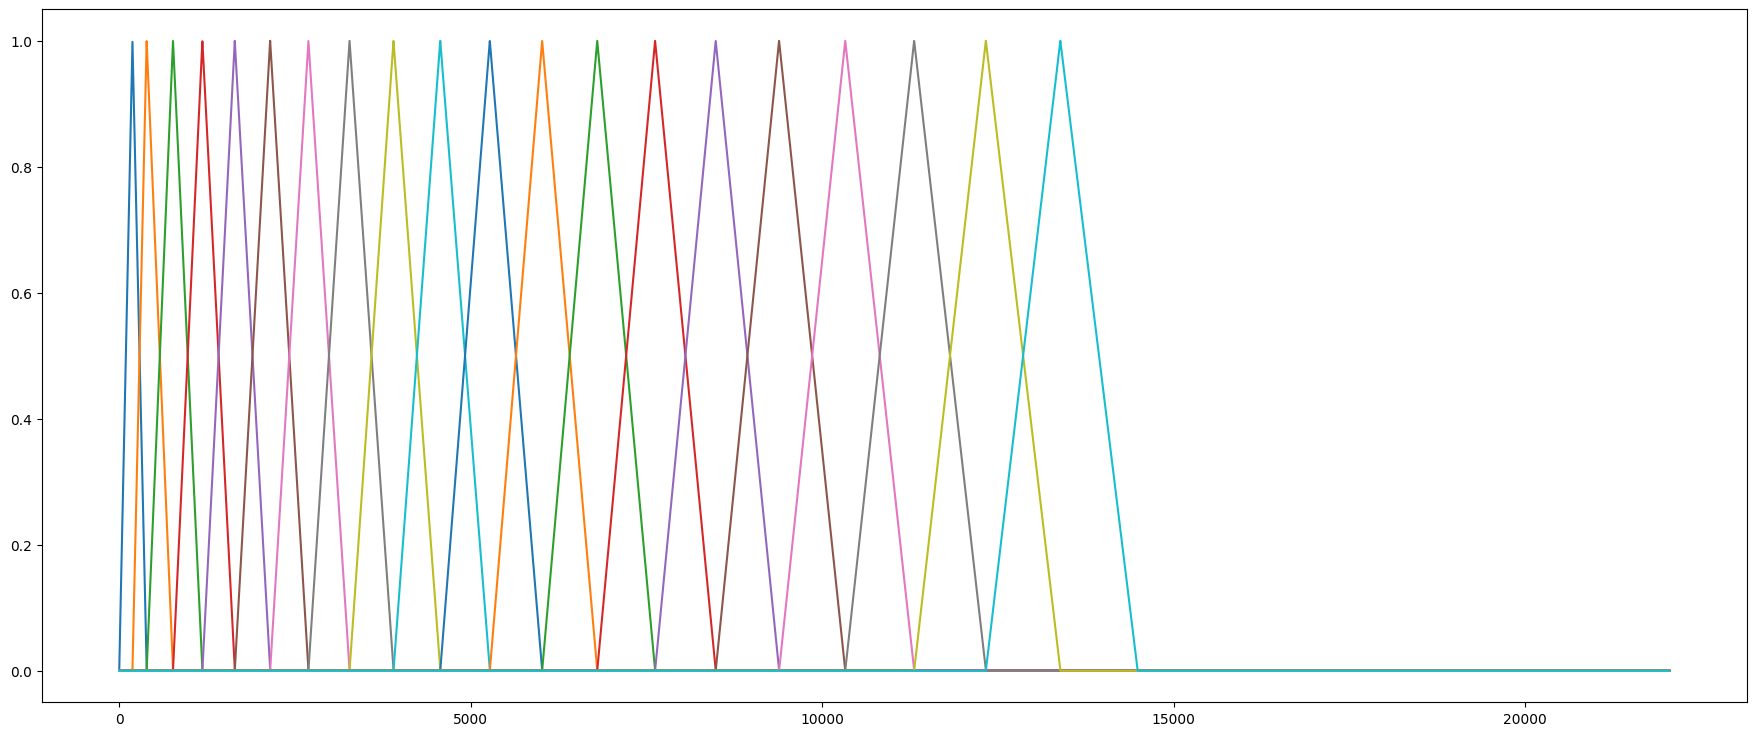

In [20]:
masH = [[H(m, xx) for xx in xf] for m in range(0, M) ]
plt.figure(figsize=(22,9))
for m in range(M):
    plt.plot(xf, masH[m])

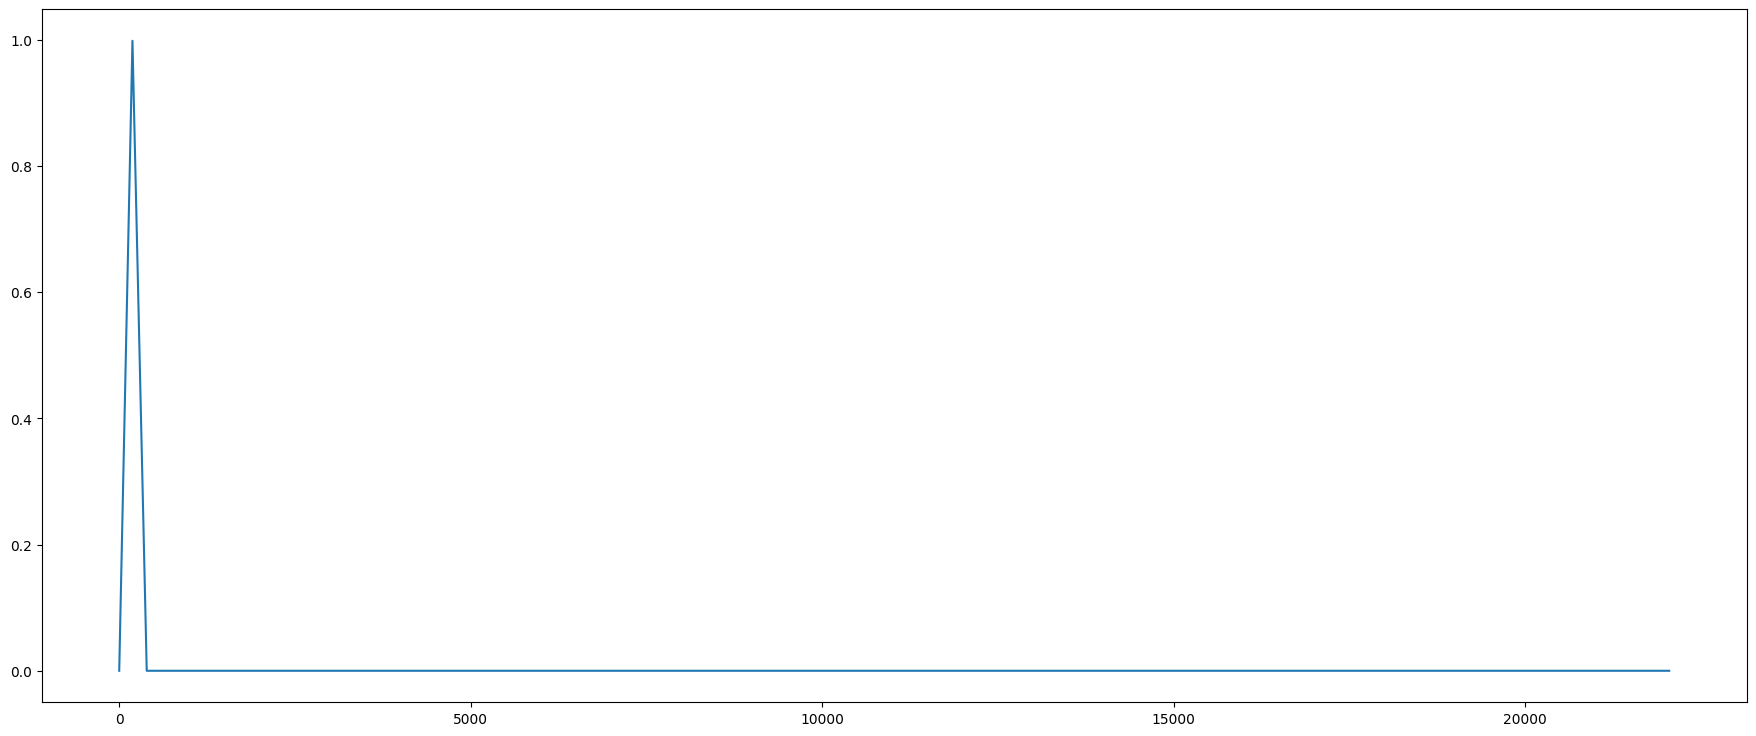

In [21]:
plt.figure(figsize=(22,9))
plt.plot(xf, [H(0, xx) for xx in xf])

In [22]:
c = [MFCC(n) for n in range(M)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [23]:
c

[629.6710319592928,
 5.1988552107818755,
 -34.24979190258669,
 -15.15241779218773,
 -15.123105975277223,
 -4.171980536380293,
 -7.284715015749892,
 -3.12613366402838,
 -0.11036043920112348,
 -0.24974044510501514,
 2.0860277465134125,
 0.7899168806760848,
 2.533644982806589,
 2.5203892315630316,
 1.0602236656401,
 0.3849754336795552,
 -0.8014910211166111,
 0.04449710020261488,
 -1.9789181710097505,
 0.2507625195866203]

Text(0.5, 1.0, 'Мэл-кепстральные коэффициенты')

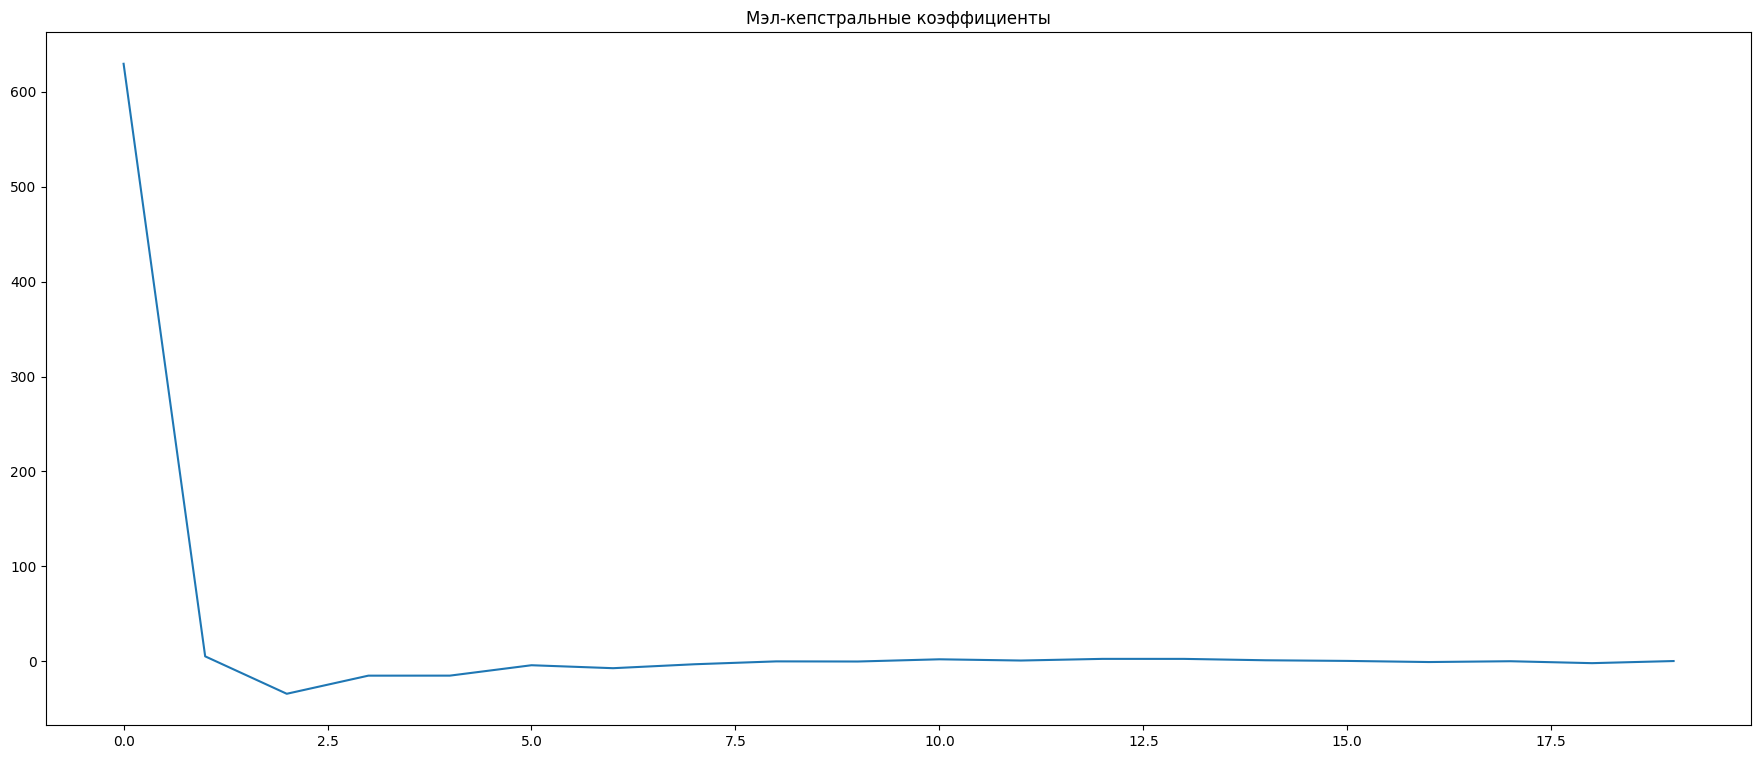

In [37]:
plt.figure(figsize=(22, 9))
plt.plot(list(range(len(c))), c)
plt.title('Мэл-кепстральные коэффициенты')

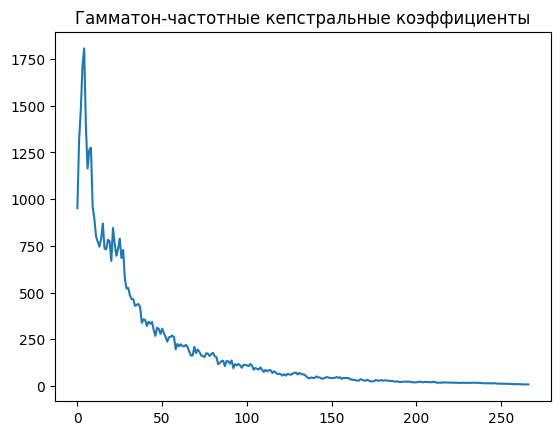

In [28]:
from spafe.features.gfcc import gfcc


gfcc = gfcc(data, fs=samplerate, num_ceps=1)
plt.plot(gfcc)
plt.title('Гамматон-частотные кепстральные коэффициенты')
plt.show()

Из графиков довольно ясно следует, что наиболее громкими, а следовательно и определяюбщими для данного сигнала являются низкие частоты. От 1000 до 5000 гц, в особенности 2500 и окрестности